<a href="https://www.kaggle.com/code/aleksandrmorozov123/geospatial-analysis?scriptVersionId=235153243" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/budapest-open-data-atlas/hoterkep3.geojson
/kaggle/input/budapest-open-data-atlas/projectIrps_h2020.csv
/kaggle/input/budapest-open-data-atlas/epuletmagassag.geojson


**In this notebook I'll show geospatial analysis with Python libraries**

In [2]:
import geopandas as gpd

gdf = gpd.read_file('/kaggle/input/budapest-open-data-atlas/hoterkep3.geojson')

print(len(gdf))
gdf.head(10)

116430


,fid,id,left,top,right,bottom,_median,geometry
0,115,115,2.106858e+06,6.031330e+06,2.106958e+06,6.031230e+06,0.0,"POLYGON ((18.92712 47.54342, 18.92623 47.54342..."
1,116,116,2.106858e+06,6.031230e+06,2.106958e+06,6.031130e+06,0.0,"POLYGON ((18.92712 47.54342, 18.92712 47.54302..."
2,149,149,2.106858e+06,6.027930e+06,2.106958e+06,6.027830e+06,0.0,"POLYGON ((18.92712 47.52280, 18.92709 47.52280..."
3,150,150,2.106858e+06,6.027830e+06,2.106958e+06,6.027730e+06,0.0,"POLYGON ((18.92712 47.52280, 18.92712 47.52222..."
4,548,548,2.106958e+06,6.031430e+06,2.107058e+06,6.031330e+06,0.0,"POLYGON ((18.92802 47.54403, 18.92753 47.54403..."
5,549,549,2.106958e+06,6.031330e+06,2.107058e+06,6.031230e+06,24.0,"POLYGON ((18.92802 47.54403, 18.92802 47.54342..."
6,550,550,2.106958e+06,6.031230e+06,2.107058e+06,6.031130e+06,78.0,"POLYGON ((18.92802 47.54342, 18.92802 47.54282..."
7,551,551,2.106958e+06,6.031130e+06,2.107058e+06,6.031030e+06,0.0,"POLYGON ((18.92802 47.54282, 18.92802 47.54262..."
8,581,581,2.106958e+06,6.028130e+06,2.107058e+06,6.028030e+06,0.0,"POLYGON ((18.92802 47.52402, 18.92750 47.52402..."
9,582,582,2.106958e+06,6.028030e+06,2.107058e+06,6.027930e+06,96.0,"POLYGON ((18.92802 47.52402, 18.92802 47.52341..."


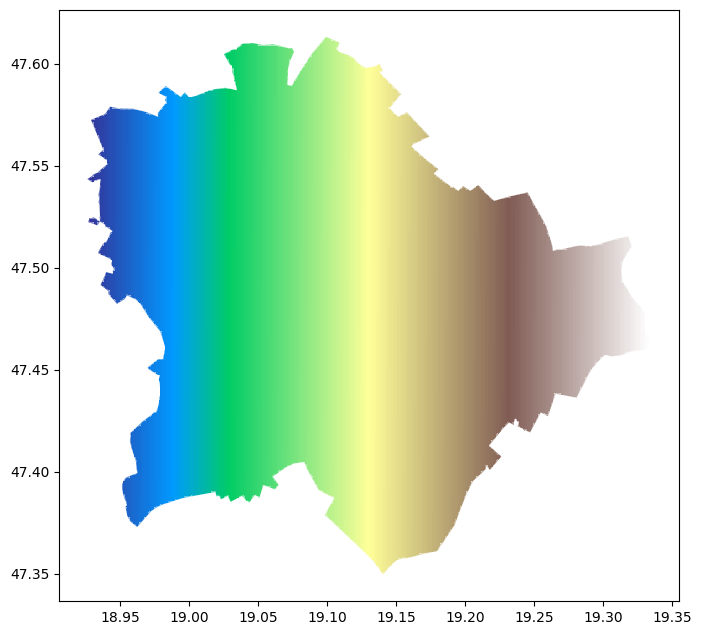

In [3]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 1, figsize = (8, 8))
city = gdf.plot(column= 'fid', ax = ax, cmap = 'terrain')

352845

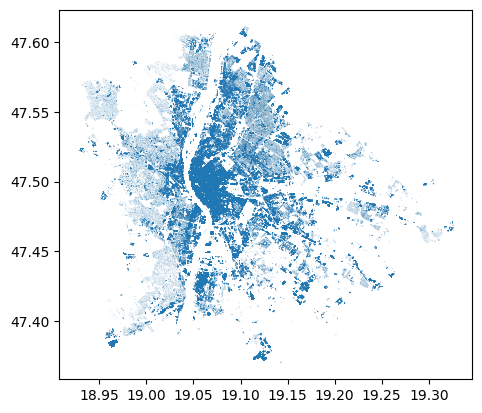

In [4]:
# parse the building height data set
gdf_1 = gpd.read_file('/kaggle/input/budapest-open-data-atlas/epuletmagassag.geojson')
gdf_1.plot()
len(gdf_1)

In [5]:
gdf_1.head(10)

,fid,osm_id,code,fclass,name,type,fid_2,DN,geometry
0,1,15092527,1500,building,None,parking,264141,9,"POLYGON ((19.01604 47.40561, 19.01728 47.40612..."
1,1,15092527,1500,building,None,parking,264128,10,"POLYGON ((19.01604 47.40561, 19.01728 47.40612..."
2,1,15092527,1500,building,None,parking,263879,10,"POLYGON ((19.01604 47.40561, 19.01728 47.40612..."
3,1,15092527,1500,building,None,parking,263849,9,"POLYGON ((19.01604 47.40561, 19.01728 47.40612..."
4,1,15092527,1500,building,None,parking,263880,9,"POLYGON ((19.01604 47.40561, 19.01728 47.40612..."
5,1,15092527,1500,building,None,parking,263897,9,"POLYGON ((19.01604 47.40561, 19.01728 47.40612..."
6,1,15092527,1500,building,None,parking,263922,9,"POLYGON ((19.01604 47.40561, 19.01728 47.40612..."
7,1,15092527,1500,building,None,parking,263940,11,"POLYGON ((19.01604 47.40561, 19.01728 47.40612..."
8,1,15092527,1500,building,None,parking,263964,9,"POLYGON ((19.01604 47.40561, 19.01728 47.40612..."
9,1,15092527,1500,building,None,parking,263984,11,"POLYGON ((19.01604 47.40561, 19.01728 47.40612..."


In [6]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 11.3 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.14.4
    Uninstalling geopandas-0.14.4:
      Successfully uninstalled geopandas-0.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.


<Axes: >

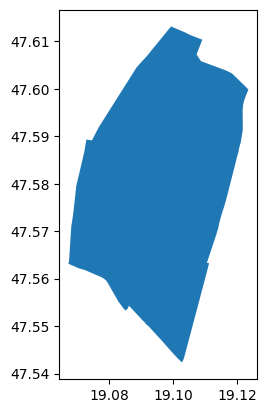

In [7]:
import osmnx as ox  

# Download the administrative boundary of the 1st district of Budapest
admin_district = ox.geocode_to_gdf('4th district, Budapest')
admin_district.plot()

In [8]:
# filter out the bulding footprints that fall into my selected districts
gdf2 = gpd.overlay(gdf_1, admin_district)

len(gdf2)

22987

,DN,name_1
12557,81,None


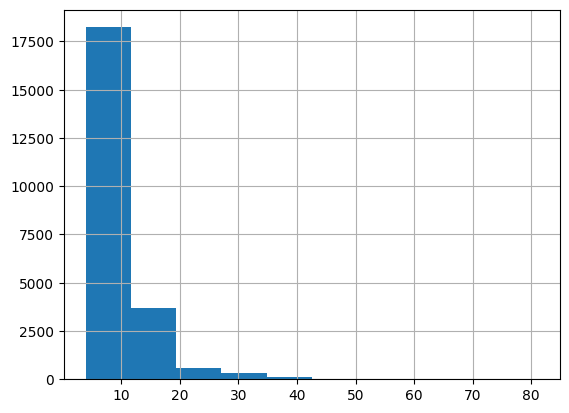

In [9]:
gdf2.DN.hist()
gdf2[gdf2.DN>60][['DN', 'name_1']]

**Road network analysis**

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((19.06720 47.56314, 19.06721 47.56314...",19.067197,47.542325,19.123463,47.613147,60153679,relation,367963,47.576169,19.095508,boundary,administrative,18,0.489092,borough,4th district,"4th district, Budapest, Central Hungary, Hungary"


<Axes: >

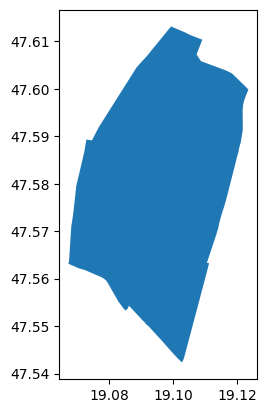

In [10]:
city = '4th District, Budapest, Hungary'

# download and plot the admin boundaries of the target area
admin = ox.geocode_to_gdf(city)
display(admin)
admin.plot()

In [11]:
# download the road network
G = ox.graph_from_polygon(admin.geometry.to_list()[0])

print('Number of intersections: ', G.number_of_nodes())
print('Number of road segments: ', G.number_of_edges())

# turning the graph into geodataframes
nodes, edges = ox.graph_to_gdfs(G)

Number of intersections:  6404
Number of road segments:  18083


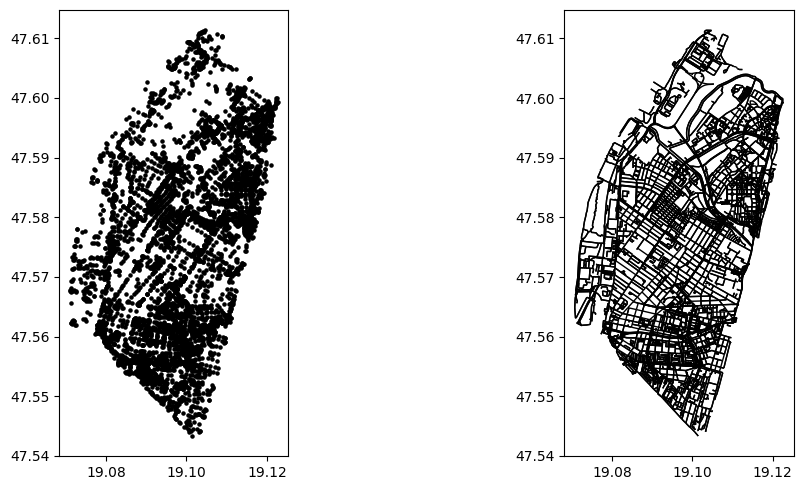

In [12]:
# plotting the two GeoDataFrames extracted from the road network graph
f, ax = plt.subplots(1, 2, figsize = (12, 5))

nodes.plot(ax=ax[0], color='k', markersize=5)
edges.plot(ax=ax[1], color='k', linewidth=1)
plt.tight_layout()

**Visualizing cities around the globe**

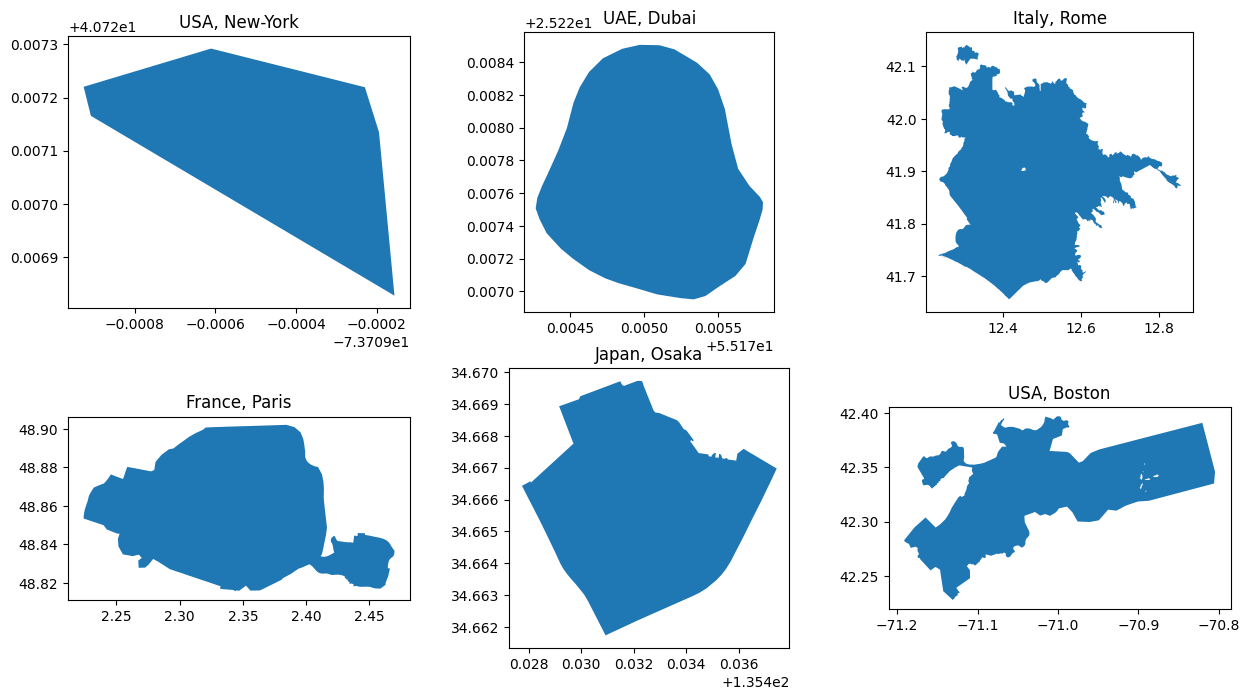

In [13]:
cities = ['USA, New-York',
         'UAE, Dubai',
         'Italy, Rome',
         'France, Paris',
         'Japan, Osaka',
         'USA, Boston']

f, ax = plt.subplots(2, 3, figsize=(15,8))
indicies = [(i, j) for i in range(2) for j in range(3)]

for idx, city in enumerate(cities):
    bx = ax[indicies[idx]]
    admin = ox.geocode_to_gdf(city)
    admin.plot(ax=bx)
    bx.set_title(city)

**Satellite images timelapses**

In [14]:
import sys
!{sys.executable} -m pip install sentinelhub --upgrade 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.8/249.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.0/236.0 kB 13.2 MB/s eta 0:00:00


In [15]:
from sentinelhub import SHConfig

client_secret = 'zPDfVmKAZ4ieMjtZ4iMJHtf4MgwPyjAp'
client_id = '16231ba5-aecb-473b-929a-4d89e84956d9'

config = SHConfig(sh_client_id = client_id, sh_client_secret = client_secret)

In [16]:
# define the bounding box coordinates using long-lat terminology
target_area_coords = (46.16, -16.15, 46.51, -15.58)

# define the image resolution (10m, 20m, 60m)
resolution = 60

# define the bounding box object
from sentinelhub import CRS, BBox, bbox_to_dimensions
target_bbox = BBox(bbox=target_area_coords, crs=CRS.WGS84)

# a quick one-liner to compute the pixel-size of the final image:
target_size = bbox_to_dimensions(target_bbox, resolution=resolution)

In [17]:
from sentinelhub import DataCollection, MimeType, MosaickingOrder, SentinelHubRequest

evalscript_true_color = """
    //VERSION=3

    function setup() {
        return {
            input: [{
                bands: ["B02", "B03", "B04"]
            }],
            output: {
                bands: 3
            }
        };
    }

    function evaluatePixel(sample) {
        return [sample.B04, sample.B03, sample.B02];
    }
"""

request_true_color = SentinelHubRequest (
    evalscript = evalscript_true_color,
    input_data =[
        SentinelHubRequest.input_data (
            data_collection = DataCollection.SENTINEL2_L1C,
            time_interval = ("2024-01-01", '2025-01-01'),
            mosaicking_order = MosaickingOrder.LEAST_CC,
        )
    ],
    responses = [SentinelHubRequest.output_response("default", MimeType.PNG)],
    bbox = target_bbox,
    size = target_size,
    config = config
)

true_color_imgs = request_true_color.get_data()
image = true_color_imgs[0]
image

array([[[16, 24, 30],
        [16, 23, 30],
        [16, 24, 30],
        ...,
        [25, 28, 28],
        [25, 28, 27],
        [38, 37, 36]],

       [[16, 23, 30],
        [16, 23, 29],
        [16, 24, 30],
        ...,
        [23, 27, 28],
        [40, 36, 37],
        [36, 34, 35]],

       [[16, 24, 30],
        [16, 24, 29],
        [16, 23, 29],
        ...,
        [35, 33, 33],
        [39, 36, 37],
        [37, 34, 35]],

       ...,

       [[24, 23, 26],
        [25, 24, 26],
        [24, 24, 26],
        ...,
        [44, 30, 30],
        [47, 31, 30],
        [53, 36, 33]],

       [[22, 23, 25],
        [24, 23, 26],
        [24, 23, 26],
        ...,
        [42, 31, 30],
        [40, 30, 30],
        [43, 33, 31]],

       [[20, 22, 25],
        [23, 23, 25],
        [20, 23, 24],
        ...,
        [46, 34, 33],
        [41, 30, 30],
        [41, 29, 29]]], dtype=uint8)

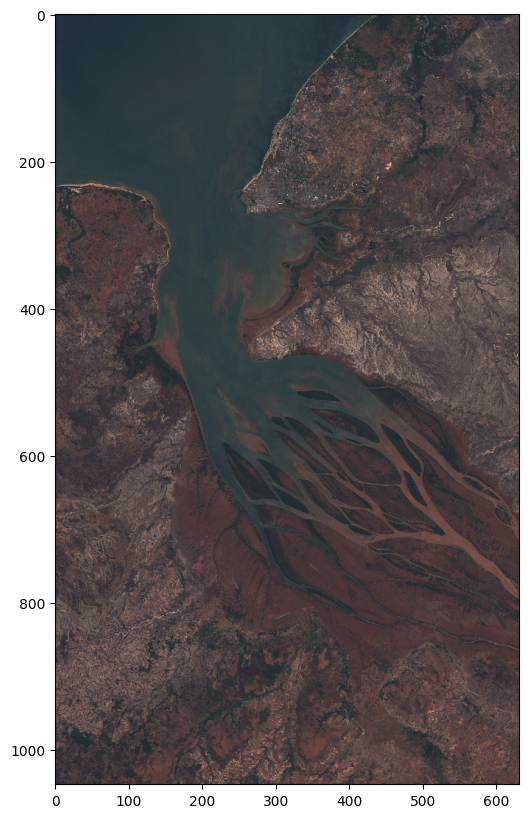

In [18]:
# visualize
f, ax = plt.subplots(1, 1, figsize = (10, 10))
factor = 2.05 / 255
clip_range = (0, 200)
ax.imshow (np.clip (image * factor, *clip_range))

(-0.5, 630.5, 1046.5, -0.5)

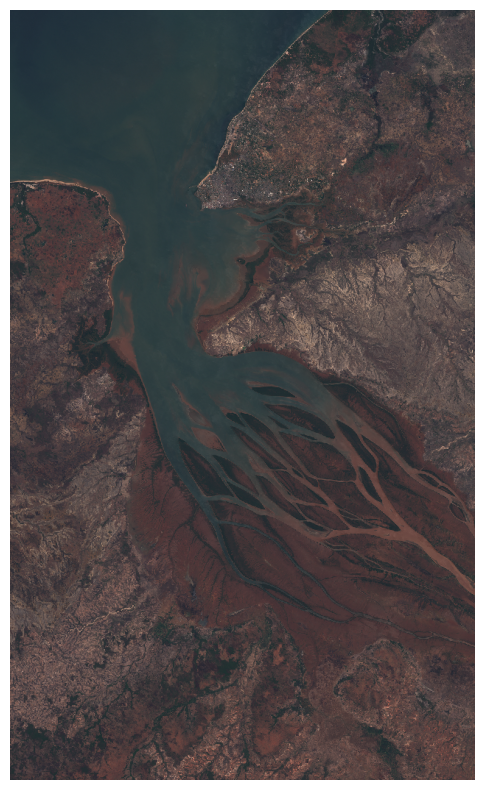

In [19]:
# create the function for getting visuals around the globe
def download_image(target_area_coords, resolution):
    # define the bounding box object
    target_bbox = BBox(bbox=target_area_coords, crs=CRS.WGS84)
    target_size = bbox_to_dimensions(target_bbox, resolution=resolution)
    # init the query
    evalscript_true_color = """
    //VERSION=3
    function setup() {return{input:
    [{bands: ["B02", "B03", "B04"]}],
    output: {bands: 3}};}
    function evaluatePixel(sample){
    return [sample.B04, sample.B03, sample.B02];}
    }"""
    # get the data
    request_true_color = SentinelHubRequest(
        evalscript=evalscript_true_color,
        input_data=[
            SentinelHubRequest.input_data(
                data_collection=DataCollection.SENTINEL2_L1C,
                time_interval=("2023-01-01", "2024-01-01"),
                mosaicking_order=MosaickingOrder.LEAST_CC,
            )
        ],
        responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
        bbox=target_bbox,
        size=target_size,
        config=config,
    )

true_color_imgs = request_true_color.get_data()
image = true_color_imgs[0]

# plot the data
f, ax = plt.subplots(1, 1, figsize=(10,10))
factor = 2.0 / 255
clip_range = (0, 200)
ax.imshow(np.clip(image * factor, *clip_range))
ax.axis('off')

In [20]:
# create a timelaps animation
foldout = '/kaggle/working/frames'

In [21]:
import calendar
import os

def save_image(target_area_coords, resolution, year, month, foldout):
    # get the naming terminology
    month_names = [calendar.month_name[i] for i in range(1, 13)]
    timestamp = str(year) + ' - ' + month_names[month-1]
    title = foldout + '/' + str(year) + ' - ' + str(month) + ' - ' + month_names[month-1]
    if not os.path.exists(title + '.png'):
        # define the bounding box object
        target_bbox = BBox(bbox=target_area_coords, crs=CRS.WGS84)
        target_size = bbox_to_dimensions(target_bbox, resolution=resolution)
        # init the query
        evalscript_true_color = """
        //VERSION=3
        function setup(){return{input: [{
        bands:["B02", "B03", "B04"]}],
        output: {bands:3}};} 
        function evaluatePixel(sample){
        return[sample.B04, sample.B03, sample.B02];
        }
        """
        # get the data
        request_true_color = SentinelHubRequest(
            evalscript=evalscript_true_color,
            input_data=[
                SentinelHubRequest.input_data(
                    data_collection=DataCollection.SENTINEL2_L1C,
                    time_interval=(str(year) + "-" + str(month) + "-01", str(year) + "-" + str(month) + "-28"),
                    mosaicking_order = MosaickingOrder.LEAST_CC,
                )
            ],
            responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
            bbox=target_bbox,
            size=target_size,
            config=config,
        )
        true_color_imgs = request_true_color.get_data()
        image = true_color_imgs[0].astype(np.uint8)
        # plot the data
        f, ax = plt.subplots(1, 1,  figsize=(10, 10))
        factor = 2.0 / 255
        clip_range = (0, 200)
        ax.imshow(np.clip(image * factor, *clip_range))
        ax.axis('off')
        ax.annotate(timestamp, xy=(0.0125, 0.967), xycoords='axes fraction', ha='left', va='center',
                bbox=dict(boxstyle='round', alpha=0.0), fontsize=26, color='w')

        plt.savefig(title + '.png', dpi = 200, bbox_inches = 'tight')
        plt.tight_layout()
        plt.close()